In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


Data Read and Pre-processing

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/475 project/diabetes.csv')
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#checking if any null value in whole dataset
null_values = dataset.isnull().sum()
print(null_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#cheking zeros in dataset
glu = (dataset['Glucose']==0).sum()
bp = (dataset['BloodPressure']==0).sum()
bmi = (dataset['BMI']==0).sum() 
print(glu)
print(bp)
print(bmi)

5
35
11


In [ ]:
#glucose, blood_pressure, BMI can not be zero. 
#filling zero values with median
dataset.Glucose.replace(0,dataset.Glucose.mean(), inplace=True)
dataset.BloodPressure.replace(0,dataset.BloodPressure.mean(), inplace=True)
dataset.BMI.replace(0,dataset.BMI.mean(), inplace=True)
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0             35        0  33.6   
1            1     85.0           66.0             29        0  26.6   
2            8    183.0           64.0              0        0  23.3   
3            1     89.0           66.0             23       94  28.1   
4            0    137.0           40.0             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Data visualization

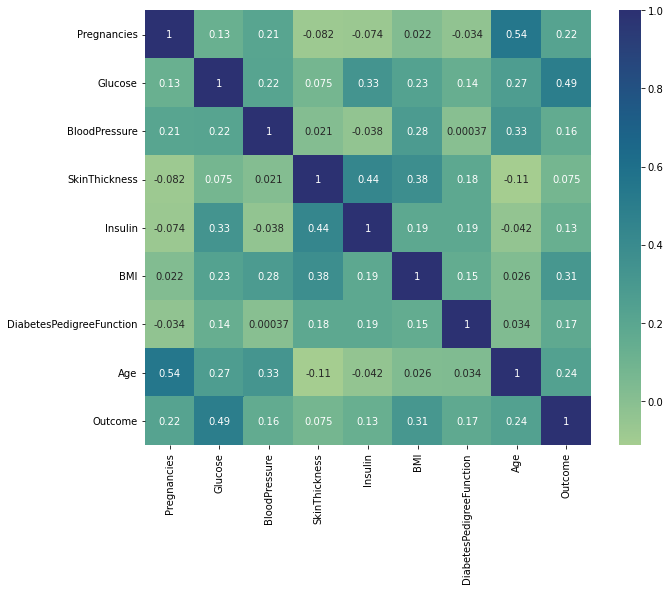

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap="crest")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


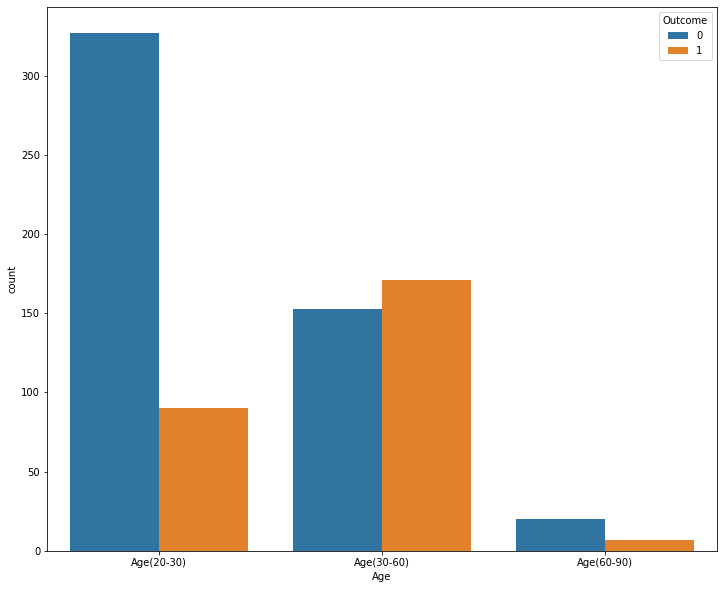

In [ ]:
age_bins=pd.cut(dataset["Age"],bins=[20,30,60,90],labels=["Age(20-30)","Age(30-60)","Age(60-90)"])
plt.figure(figsize=(12,10))
sns.countplot(age_bins,hue=dataset["Outcome"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


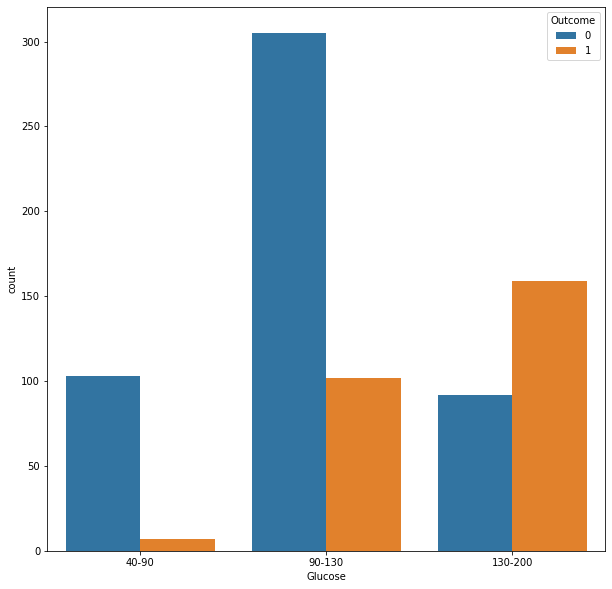

In [ ]:
glucose_bins=pd.cut(dataset["Glucose"],bins=[40,90,130,200],labels=["40-90","90-130","130-200"])
plt.figure(figsize=(10,10))
sns.countplot(glucose_bins,hue=dataset["Outcome"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


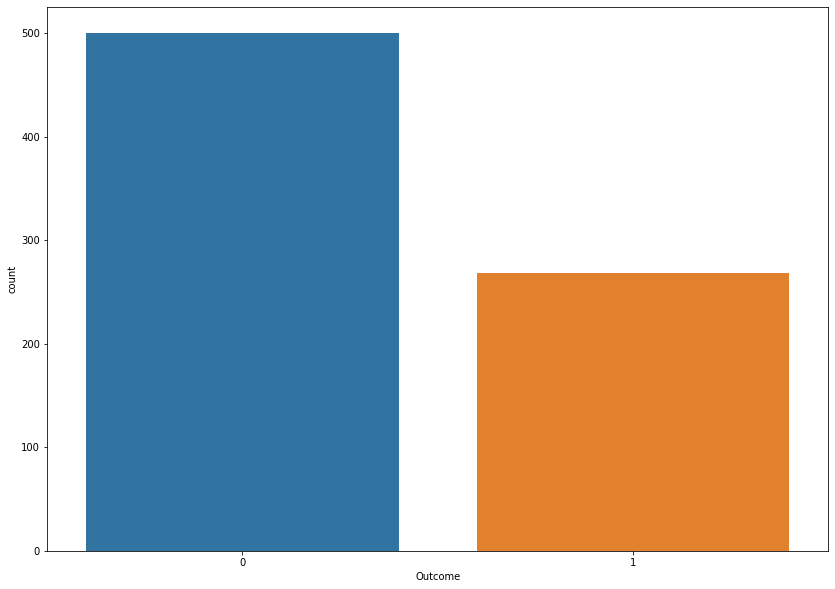

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot("Outcome",data=dataset)

In [ ]:
#pca = PCA()
#data_new = pca.fit_transform(dataset)
#print(data_new)


In [ ]:
#df = pd.DataFrame(data_new)
#print(df)

Train test split


In [ ]:
features=dataset.drop(['Outcome','DiabetesPedigreeFunction','SkinThickness'],axis =1)
labels=dataset.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test=train_test_split(features,labels,test_size=0.2,random_state=0)
print(X_train)

     Pregnancies  Glucose  BloodPressure  Insulin        BMI  Age
603            7    150.0      78.000000      126  35.200000   54
118            4     97.0      60.000000        0  28.200000   22
247            0    165.0      90.000000      680  52.300000   23
157            1    109.0      56.000000      135  25.200000   23
468            8    120.0      69.105469        0  30.000000   38
..           ...      ...            ...      ...        ...  ...
763           10    101.0      76.000000      180  32.900000   63
192            7    159.0      66.000000        0  30.400000   36
629            4     94.0      65.000000        0  24.700000   21
559           11     85.0      74.000000        0  30.100000   35
684            5    136.0      82.000000        0  31.992578   69

[614 rows x 6 columns]


Train with XGBCClassifier

In [ ]:
from xgboost import XGBClassifier
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=2)),
         ('clf', XGBClassifier())]
  
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', XGBClassifier())])

In [ ]:
y_pred=pipe_lr.predict(X_test)
y_score = pipe_lr.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[93 14]
 [16 31]]


In [ ]:
from sklearn.metrics import f1_score
F1=f1_score(Y_test,y_pred,average='weighted')
print("f1_score is =" + str(F1))

f1_score is =0.8039792333270595


In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
    
result = accuracy(cm)

In [ ]:
print("Accuracy of Xgboost classifier is =" + str(result) )

Accuracy of Xgboost classifier is =0.8051948051948052


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
print(accuracy_score(Y_test,y_pred))

0.8051948051948052


Train with SVM

In [ ]:
from sklearn.svm import SVC
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=2)),
         ('clf', SVC(kernel='linear',C=200))]
  
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', SVC(C=200, kernel='linear'))])

In [ ]:
y_pred=pipe_lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[95 12]
 [22 25]]


In [ ]:
from sklearn.metrics import f1_score
F1=f1_score(Y_test,y_pred,average='weighted')
print("f1_score is =" + str(F1))

f1_score is =0.7710072665429808


In [ ]:
print(accuracy_score(Y_test,y_pred))

0.7792207792207793


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       107
           1       0.68      0.53      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.77      0.78      0.77       154



Train with logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=2)),
         ('clf', LogisticRegression(C=0.05))]
  
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression(C=0.05))])

In [ ]:
y_pred=pipe_lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[96 11]
 [22 25]]


In [ ]:
from sklearn.metrics import f1_score
F1=f1_score(Y_test,y_pred,average='weighted')
print("f1_score is =" + str(F1))

f1_score is =0.7767527251864601


In [ ]:
print(accuracy_score(Y_test,y_pred))

0.7857142857142857


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.69      0.53      0.60        47

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



Train with random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=2)),
         ('clf',RandomForestClassifier(n_estimators = 100))]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', RandomForestClassifier())])

In [ ]:
y_pred=pipe_lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[86 21]
 [19 28]]


In [ ]:
from sklearn.metrics import f1_score
F1=f1_score(Y_test,y_pred,average='weighted')
print("f1_score is =" + str(F1))

f1_score is =0.7417401780609327


In [ ]:
print(accuracy_score(Y_test,y_pred))

0.7402597402597403


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       107
           1       0.57      0.60      0.58        47

    accuracy                           0.74       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154



Summary of the 4 model performance

Text(0, 0.5, 'Evaluation Metrics')

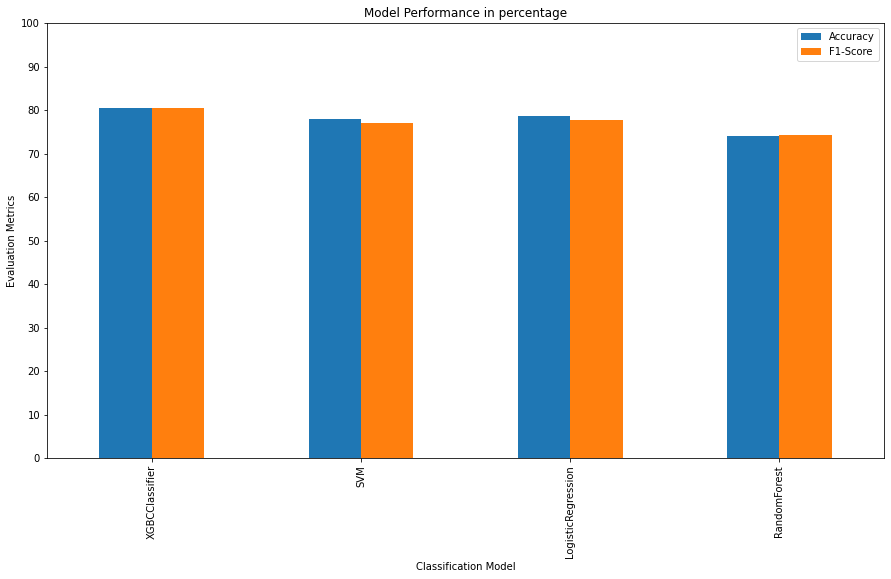

In [ ]:
plotdata = pd.DataFrame({

    "Accuracy":[0.8051*100, 0.7792*100, 0.7857*100, 0.7402*100],

    "F1-Score":[0.8039*100,0.7710*100,0.7767*100,0.7417*100],

    },

    index=['XGBCClassifier', 'SVM', 'LogisticRegression', 'RandomForest'])

plotdata.plot(kind="bar",figsize=(15, 8))

plt.yticks(range(0, 101, 10))

plt.title("Model Performance in percentage")

plt.xlabel("Classification Model")

plt.ylabel("Evaluation Metrics")

A testcase

In [ ]:
a=np.array([[6,	148,72,	0,	33.6,	50]])
pipe_lr.predict(a)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])